In [67]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
df=pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<Axes: >

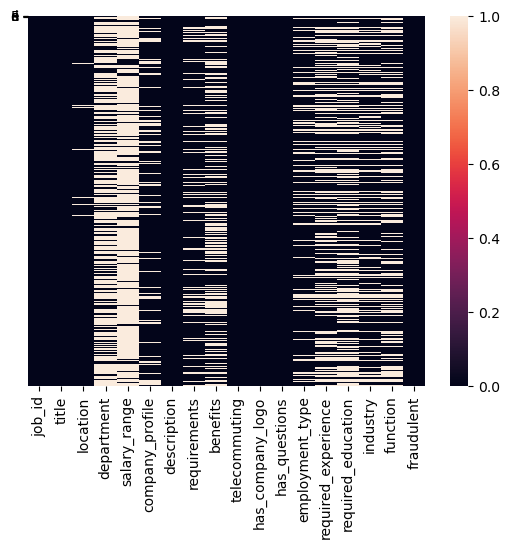

In [7]:
sns.heatmap(df.isnull(),yticklabels='False')

In [8]:
df.duplicated().sum()

0

In [9]:
cat=[]
num=[]
for columns in df.columns:
    if df[columns].dtypes !='object':
            num.append(columns)
    else:
        cat.append(columns)

In [11]:
print("categorical columns:",cat)
print("numerical columns:",num)

categorical columns: ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
numerical columns: ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [12]:
df[num].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   job_id            17880 non-null  int64
 1   telecommuting     17880 non-null  int64
 2   has_company_logo  17880 non-null  int64
 3   has_questions     17880 non-null  int64
 4   fraudulent        17880 non-null  int64
dtypes: int64(5)
memory usage: 698.6 KB


<Axes: >

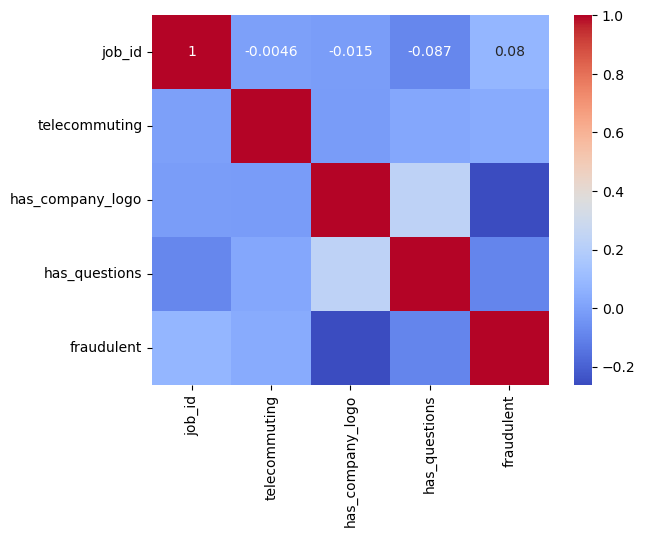

In [15]:
sns.heatmap(df[num].corr(), cmap='coolwarm', annot=True)

In [16]:
df.drop(columns=['has_company_logo','has_questions','telecommuting'], inplace=True)

In [17]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Contract,Not Applicable,Professional,Graphic Design,Design,0


<Axes: xlabel='fraudulent', ylabel='count'>

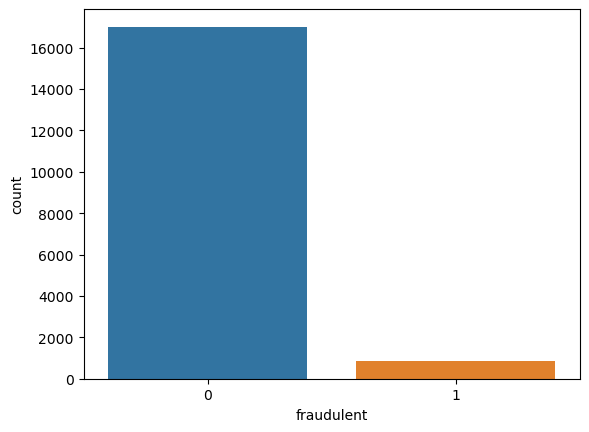

In [18]:
sns.countplot(data=df,x='fraudulent')

In [38]:
df['country'] = df['location'].str.split(',').str[0]

In [39]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   90
dtype: int64

Text(0, 0.5, 'No. of Jobs')

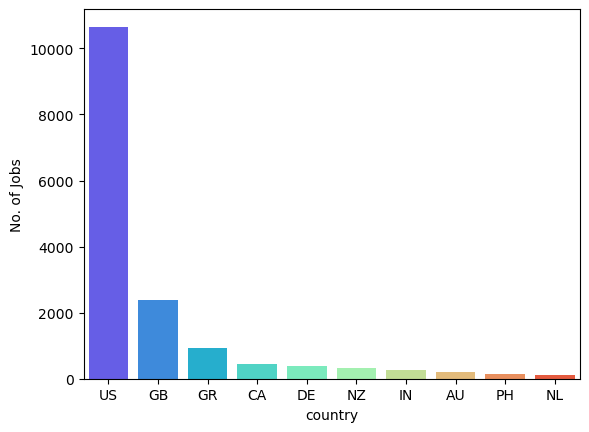

In [53]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

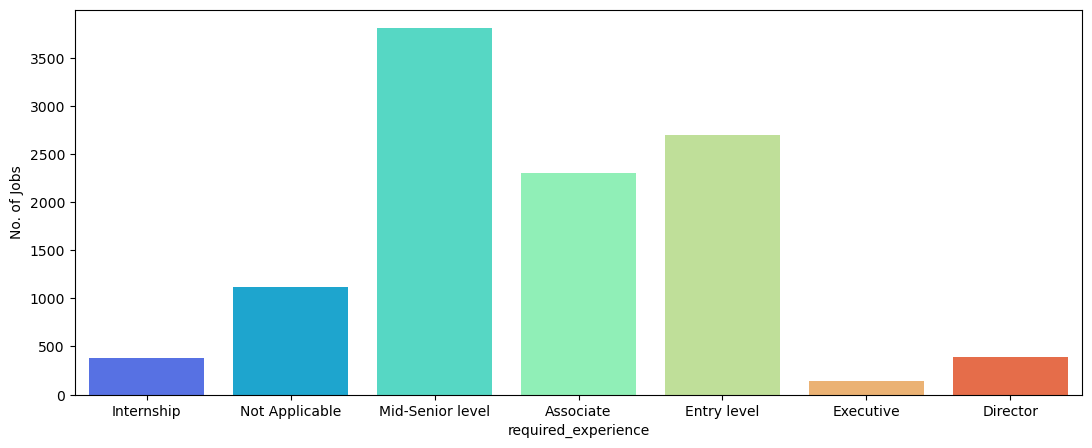

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

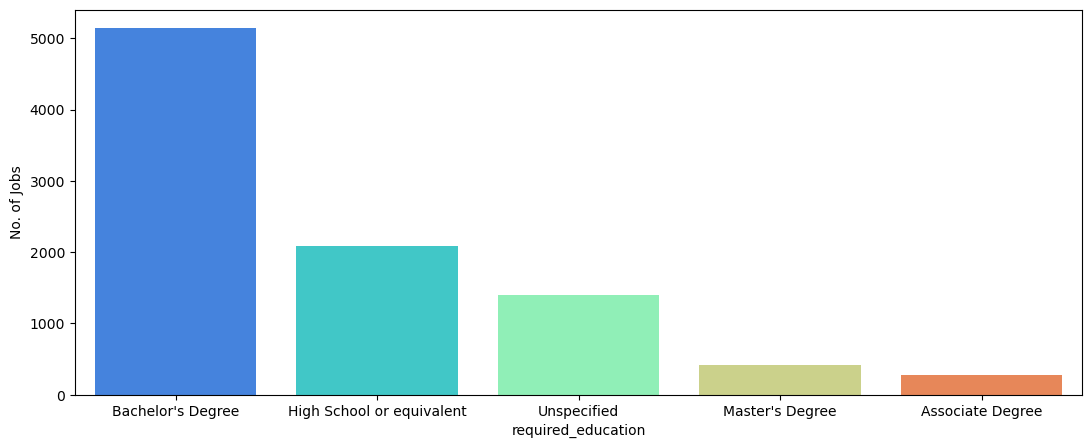

In [56]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [57]:
df.fillna(' ',inplace=True)

In [58]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department','country'], inplace=True)

In [59]:
df

,job_id,fraudulent,combined_text
0,1,0,"Marketing Intern US, NY, New York We're Food..."
1,2,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...
17875,17876,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,0,"Payroll Accountant US, PA, Philadelphia WebL..."
17877,17878,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


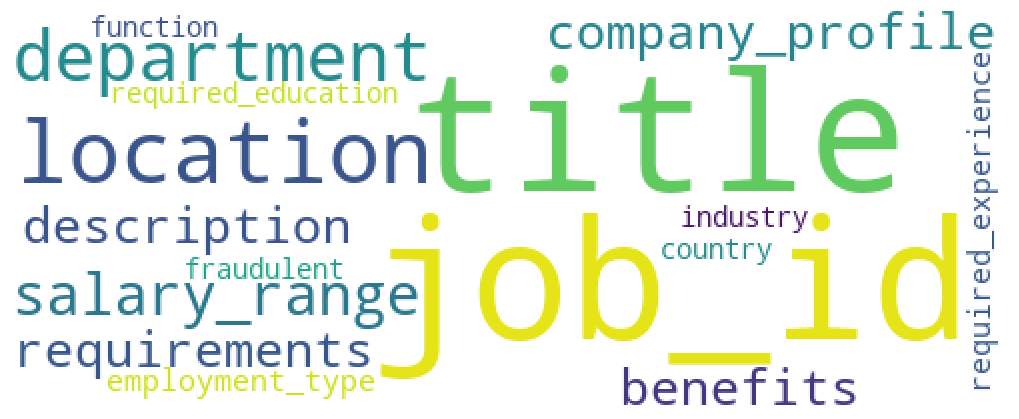

In [69]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fraud))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

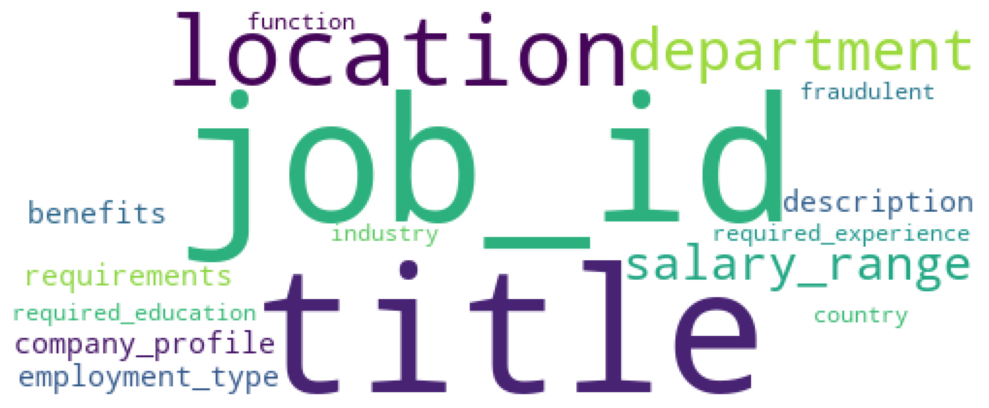

In [70]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [71]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [72]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [76]:
nlp = spacy.load("en_core_web_sm")
def normalize_text(text):
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

In [77]:
df['combined_text']=df['combined_text'].apply(normalize_text)

In [78]:
df.head()

,job_id,fraudulent,combined_text
0,1,0,market intern we ny new york food52 create gro...
1,2,0,customer service cloud video production nz auc...
2,3,0,commission machinery assistant cma us ia wever...
3,4,0,account executive washington dc us dc washingt...
4,5,0,bill review manager we fl fort worth spotsourc...


In [80]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sayantan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [81]:
text_columns = ['combined_text']
df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))
X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']
vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])
with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

/tmp/ipykernel_17144/1864623127.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)


In [82]:
X=combined_matrix_train
y=df['fraudulent'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

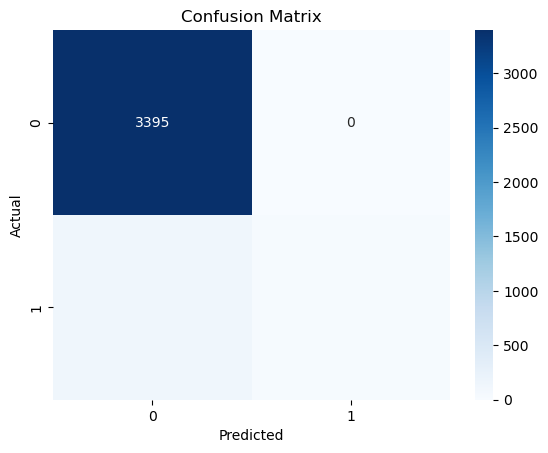

Cross-validation scores: [0.95456134 0.9552604  0.95456134 0.95630898 0.9548951 ]
Average cross-validation score: 0.9551174341212789
Test set accuracy: 0.9594519015659956
Test set precision: 1.0
Test set recall: 0.19889502762430938
Test set F1 score: 0.3317972350230415


In [86]:
model = MultinomialNB()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

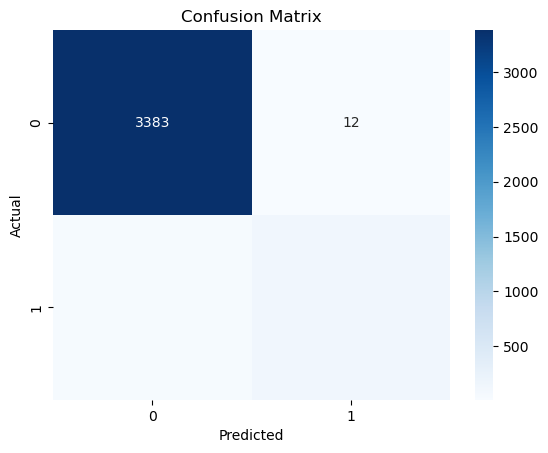

Cross-validation scores: [0.98077595 0.98077595 0.98462076 0.98497029 0.98321678]
Average cross-validation score: 0.9828719480449646
Test set accuracy: 0.9848993288590604
Test set precision: 0.9205298013245033
Test set recall: 0.7679558011049724
Test set F1 score: 0.8373493975903615


In [87]:
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [88]:
fraud=df[df['fraudulent']==1]
real=df[df['fraudulent']==0]

In [89]:
fraud.shape

(866, 4)

In [90]:
real.shape

(17014, 4)

In [91]:
fraud_re=fraud.sample(17014,replace=True)

In [92]:
fraud_re.shape

(17014, 4)

In [93]:
df_re=pd.concat([fraud_re,real],ignore_index=True)

<Axes: xlabel='fraudulent', ylabel='count'>

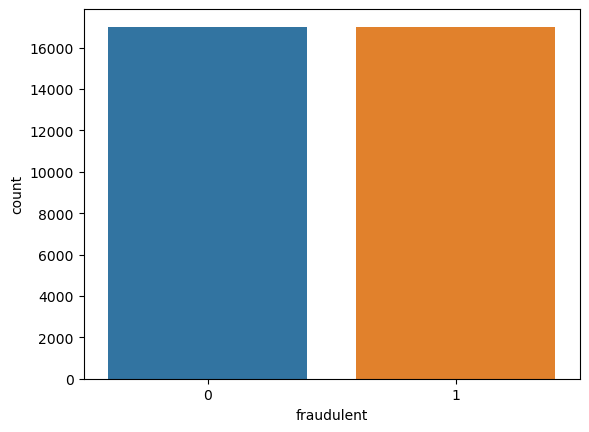

In [94]:
sns.countplot(data=df_re,x='fraudulent')

In [95]:
df_re.reset_index()

,index,job_id,fraudulent,combined_text,pos_features
0,0,662,1,director strategy we ca san mateo aptitude sta...,NN NN PRP MD VB JJ NN VBG NN NN VBG NNS JJ JJ ...
1,1,6636,1,executive chef responsible food production inc...,NN NN JJ NN NN VBP NN JJ NN NN VB NN NN NN NN ...
2,2,17827,1,customer service accounting clerk us mi detroi...,NN NN NN VBP PRP JJ JJ NN NN NN NN VB NN VBN N...
3,3,17527,1,cruise staff want urgent us tx dallas 6 ultra ...,JJ NN VBP JJ PRP VBP JJ CD JJ NN JJ NN NN RB V...
4,4,17592,1,home base payroll typist datum entry clerk pos...,NN NN NN NN NN NN NN NN JJ PRP VBP JJ JJ VBG J...
...,...,...,...,...,...
34023,34023,17876,0,account director distribution ca toronto vend ...,NN NN NN MD VB JJ NN JJ JJ NN VBN NN PRP VBP J...
34024,34024,17877,0,payroll accountant we pa philadelphia weblinc ...,NN NN PRP VBP JJ NN NN NN NN NN NN JJ NN NN NN...
34025,34025,17878,0,project cost control staff engineer cost contr...,NN NN NN NN VBZ NN NN VBP VBP PRP JJ NN IN JJ ...
34026,34026,17879,0,graphic designer ng la lagos nemsia studio loo...,JJ NN JJ NN FW JJ NN NN VBD JJ JJ NN NN JJ NN ...


In [96]:
text_columns = ['combined_text']
df_re['pos_features'] = df_re[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df_re['pos_features'] = df_re['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))
X_train = df_re.drop('fraudulent', axis=1)
y_train = df_re['fraudulent']
vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])
with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

/tmp/ipykernel_17144/2040447848.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_re['pos_features'] = df_re[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)


In [99]:
X=combined_matrix_train
y=df_re['fraudulent'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

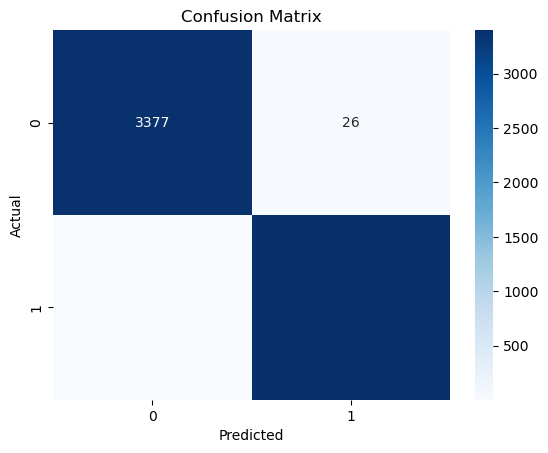

Cross-validation scores: [0.99485767 0.99614325 0.99338722 0.99485672 0.99301984]
Average cross-validation score: 0.9944529389816946
Test set accuracy: 0.9955921245959447
Test set precision: 0.9924087591240875
Test set recall: 0.9988245665589186
Test set F1 score: 0.9956063268892794


In [101]:
model = MultinomialNB()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

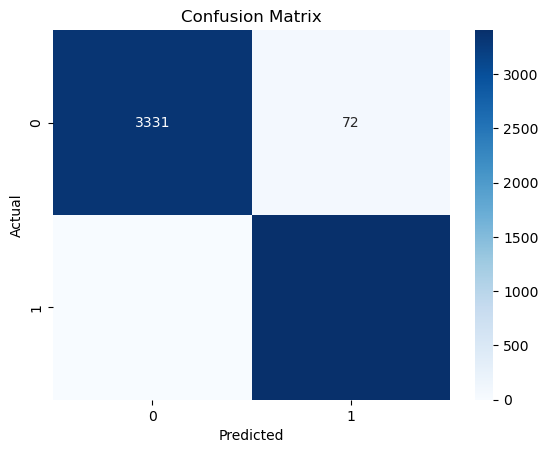

Cross-validation scores: [0.98898072 0.98696051 0.98677443 0.98714181 0.98640705]
Average cross-validation score: 0.9872529044367934
Test set accuracy: 0.9894210990302674
Test set precision: 0.9792805755395684
Test set recall: 1.0
Test set F1 score: 0.9895318406513521


In [102]:
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)